# Imperialumab Sales Booster Recommendations
--------------------------
### Content Page

<a href='#Summary'>Summary</a>

<a href='#Introduction'>Introduction</a>


<a href='#Technologies_and_Techniques'>Technologies and Techniques</a>


<a href='#Cleaning_and_preparing_the_data'>Cleaning and preparing the data</a>

<a href='#Results'>Results (Analysis, observations and recommendations)</a>


<a href='#Recommendations'>Recommendations</a>

<a href='#Conclusion'>Conclusion</a>

<a href='#References'>References</a>

## Summary
Main aim of below report is to analysze sales and marketing data provided for Imerialumab and it's competitors (Kingsumab and Uclumab) and provide recommendations to improve sales of company. Report also provides main observations about sales and marketing pattern of all companies in all regions.

**Overview of Recommendations:**
* `South East, North West, Scotland and Wales` regions conducts less than `10 Face 2 face` detailing which should be brought down to average of 12 for better results. 
* `London and East Midlands` has crossed this optimal count of `12` and might be reason for losing customers in these regions. They should bring down face 2 face detailing count to optimal 12. 
* Imperialumab should bring average `Med Education count` to `~19-20` in all regions with main targeting regions like `South East, West Midlands, North East, North West, Scotland, Northern Ireland and Wales`.
* Try to send `more hard mails` in regions `North West, Scotland and Wales` as they seems to have less compared to other regions and optimal value of 15.
* `Northern Ireland` should sent `less hard mails` which is near to average of all regions and optimal value of 15.
* Imperialumab should `decrease average unsolicited e-mails` sent by company from average `14 to around 9 per region` to get best results.
* `Scotland, West Midlands, London and South East` has sent more than `15 unsolicited e-mails` which can be spamming user.Try to bring down count to 9.
* Inform customers about `benefits of using Imperialumab` than its competitor's during face-2-face detailing and medical education which are expalined in detailed below in `Recommendations section`.

## Introduction
UK based pharmaceutical company has developed drug named `imperialumab` for treatement of pancreatic cancer. Drug development cycle completed in `March-2017` with it going for sales in various regions of UK. It's two quite aggressive competitors also developed drugs (`uclumab & kingsumab`) for treatment of pancreatic cancer and started selling it in `June-2018` almost `1 year 3 months later` than `imperialumab`. We have been provided with sales and marketing data of `imperialumab` and its 2 competitiors `uclumab & kingsumab`. Our main task as a part of this assignment is to analyses data of sales and marketing of all companies and play roles of Analytics Translator to provide observations and suggest recommendations for improvement of sales of `imperialumab` to MD of company. 

**Sales Data:**

Sales Data consist of total sales done in all regions in million $ per month from Mar-2017 till Jun-2019 for `imperialumab, uclumab & kingsumab`.

**Marketing Data:**

Marketing Data consists of `count` of 4 common marketing strategies used by `imperialumab, uclumab & kingsumab`.
* Face 2 Face 
* Med Ed
* Solicited e-mail
* Hard mail

**List of Observations:**
* Imperialumab has highest sales till now which is `~3 times than Kingsumab` and `~11 times than Uclumab`.
* Imperialumab seems to be leading market as of now with `fierce competition` from `Kingsumab` who started almost a year late.
* Companies shows `fast growth` in `inital 9-12 months` and then `stagnate`.

**List of Hypothesis:**
* `Kingsumab's` growth will `cross` sales of `Imperialumab` in next `6 months`.
* Imperialumab salesmen has conducted `highest face 2 face interview` with doctors in all regions.
* Imperialumab has performed `highest number of Med Eds` compared to Kingsumab and Uclumab.
* Imperialumab has sent highest amount of unsolicited e-mails than Uclumab & Kingsumab.
* Imperialumab has sent highest amount of hard mails in all regions. 

## Technologies_and_Techniques
* Total Analysis is done in `Python` and is maintained in `Jupyter notebook` which can be rerun by anyone to reproduce same results with given data.
* `Pandas` is primary library used for loading and maintaining data along with manipulations on columns.
* `Matplotlib` is primary library used for all visualisation. 
* `scatter plots` are used to show pattern and `bar charts` are used to show distributions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings('ignore')
np.set_printoptions(precision=3)
pd.set_option('precision',3)

%matplotlib inline

## Cleaning_and_preparing_the_data
* Loading sales and marketing data of imperialumab and its compititors (kingsumab & uclumab) from excel.
* Transposing dataframes to change index of sales and marketing dataframes. Reindexing with proper datetime index.
* Combining sales data of imperialumab with its competitor in one dataframe for analysis.
* Combining sales marketing of imperialumab with its competitor in one dataframe for analysis.
* Calculating monthly percentage change in sales of imperialumab, uclumab and kingsumab for growth analysis.

In [2]:
sheet1 = pd.read_excel('/kaggle/input/imperialumab/Imperialumab/imperialumab-analytics-workshop.xlsx',sheet_name=0, skiprows=3)
imperialumab_sales = sheet1.transpose()[2:]
imperialumab_sales.columns = ['Imperialumab']
imperialumab_sales = imperialumab_sales.set_index(pd.date_range(start='03-01-2017',end='06-01-2019', freq='MS'))
imperialumab_sales.head()

,Imperialumab
2017-03-01,0
2017-04-01,10
2017-05-01,12
2017-06-01,15
2017-07-01,55


In [3]:
imperialumab_sales.tail()

,Imperialumab
2019-02-01,275
2019-03-01,270
2019-04-01,265
2019-05-01,270
2019-06-01,271


In [4]:
sheet2 = pd.read_excel('/kaggle/input/imperialumab/Imperialumab/imperialumab-analytics-workshop.xlsx',sheet_name=1, skiprows=3)
competitor_sales = sheet2.transpose()[2:]
competitor_sales.columns = ['Uclumab', 'Kingsumab']
competitor_sales = competitor_sales.set_index(pd.date_range(start='03-01-2017',end='06-01-2019', freq='MS'))
competitor_sales.head()

,Uclumab,Kingsumab
2017-03-01,0,0
2017-04-01,0,0
2017-05-01,0,0
2017-06-01,0,0
2017-07-01,0,0


In [5]:
competitor_sales.tail()

,Uclumab,Kingsumab
2019-02-01,42,190
2019-03-01,40,209
2019-04-01,44,225
2019-05-01,42,245
2019-06-01,44,250


In [6]:
total_sales_data = imperialumab_sales.join(competitor_sales)
total_sales_data['Imperialumab_Sales_PCT_CHANGE'] = total_sales_data.Imperialumab.pct_change() *100
total_sales_data['Uclumab_Sales_PCT_CHANGE'] = total_sales_data.Uclumab.pct_change() *100
total_sales_data['Kingsumab_Sales_PCT_CHANGE'] = total_sales_data.Kingsumab.pct_change() *100
total_sales_data

,Imperialumab,Uclumab,Kingsumab,Imperialumab_Sales_PCT_CHANGE,Uclumab_Sales_PCT_CHANGE,Kingsumab_Sales_PCT_CHANGE
2017-03-01,0,0,0,NaN,NaN,NaN
2017-04-01,10,0,0,inf,NaN,NaN
2017-05-01,12,0,0,20.000,NaN,NaN
2017-06-01,15,0,0,25.000,NaN,NaN
2017-07-01,55,0,0,266.667,NaN,NaN
2017-08-01,80,0,0,45.455,NaN,NaN
2017-09-01,95,0,0,18.750,NaN,NaN
2017-10-01,120,0,0,26.316,NaN,NaN
2017-11-01,145,0,0,20.833,NaN,NaN
2017-12-01,160,0,0,10.345,NaN,NaN


In [7]:
sheet3 = pd.read_excel('/kaggle/input/imperialumab/Imperialumab/imperialumab-analytics-workshop.xlsx',sheet_name=2, skiprows=3)
imperialumab_marketing = sheet3.transpose()[2:]
imperialumab_marketing.columns = ['Imperialumab_Face_2_Face','Imperialumab_Med_Ed','Imperialumab_Unsolicited_e-mail','Imperialumab_Hard_mail']
imperialumab_marketing.head()

,Imperialumab_Face_2_Face,Imperialumab_Med_Ed,Imperialumab_Unsolicited_e-mail,Imperialumab_Hard_mail
South West,12,15,14,15
South East,10,12,16,14
London,13,15,17,16
East Midlands,14,13,12,15
West Midlands,12,10,19,14


In [8]:
sheet4 = pd.read_excel('/kaggle/input/imperialumab/Imperialumab/imperialumab-analytics-workshop.xlsx',sheet_name=3, skiprows=3)
competitor_marketing = sheet4.transpose().iloc[2:, [0,1,2,3,10,11,12,13]]
competitor_marketing.columns = ['Uclumab_Face_2_Face','Uclumab_Med_Ed','Uclumab_Unsolicited_e-mail','Uclumab_Hard_mail',\
                                'Kingsumab_Face_2_Face','Kingsumab_Med_Ed','Kingsumab_Unsolicited_e-mail','Kingsumab_Hard_mail']
competitor_marketing.head()

,Uclumab_Face_2_Face,Uclumab_Med_Ed,Uclumab_Unsolicited_e-mail,Uclumab_Hard_mail,Kingsumab_Face_2_Face,Kingsumab_Med_Ed,Kingsumab_Unsolicited_e-mail,Kingsumab_Hard_mail
South West,24,2,0,15,12,19,9,13
South East,25,5,1,15,10,20,10,14
London,21,4,0,15,13,21,9,16
East Midlands,23,6,1,15,14,19,8,13
West Midlands,24,2,2,15,12,18,7,15


In [9]:
total_marketing = imperialumab_marketing.join(competitor_marketing)
total_marketing

,Imperialumab_Face_2_Face,Imperialumab_Med_Ed,Imperialumab_Unsolicited_e-mail,Imperialumab_Hard_mail,Uclumab_Face_2_Face,Uclumab_Med_Ed,Uclumab_Unsolicited_e-mail,Uclumab_Hard_mail,Kingsumab_Face_2_Face,Kingsumab_Med_Ed,Kingsumab_Unsolicited_e-mail,Kingsumab_Hard_mail
South West,12,15,14,15,24,2,0,15,12,19,9,13
South East,10,12,16,14,25,5,1,15,10,20,10,14
London,13,15,17,16,21,4,0,15,13,21,9,16
East Midlands,14,13,12,15,23,6,1,15,14,19,8,13
West Midlands,12,10,19,14,24,2,2,15,12,18,7,15
North East,11,8,8,16,25,3,2,15,11,20,6,17
North West,10,11,12,12,21,6,0,15,10,21,8,10
Scotland,8,8,21,10,25,8,4,15,8,22,9,12
Northern Ireland,12,10,14,20,20,9,1,15,12,18,10,15
Wales,10,12,10,11,21,11,0,15,10,20,8,15


## Results

**Observation:** Imperialumab has `highest sales` till now which is `~3 times` than `Kingsumab` and `~11` times than `Uclumab`.

In [10]:
total_sales_till_now = total_sales_data[['Imperialumab', 'Uclumab', 'Kingsumab']].sum()
print('Total Sales Till Now By Companies($Mn) : ')
print(total_sales_till_now)
print('-'*100)
average_sales_per_month = total_sales_data[['Imperialumab', 'Uclumab', 'Kingsumab']].mean()
print('\nAverage Sales Per Month By Companies($Mn) : ')
print(average_sales_per_month)

print('-'*100)
print('\nImperialumab has done %.2f times sales than Kingsumab'%(total_sales_till_now.Imperialumab/total_sales_till_now.Kingsumab))
print('Imperialumab has done %.2f times sales than Uclumab'%(total_sales_till_now.Imperialumab/total_sales_till_now.Uclumab))
print('Kingsumab has done %.2f times sales than Uclumab\n'%(total_sales_till_now.Kingsumab/total_sales_till_now.Uclumab))

Total Sales Till Now By Companies($Mn) : 
Imperialumab    5124.0
Uclumab          451.0
Kingsumab       1828.0
dtype: float64
----------------------------------------------------------------------------------------------------

Average Sales Per Month By Companies($Mn) : 
Imperialumab    183.000
Uclumab          16.107
Kingsumab        65.286
dtype: float64
----------------------------------------------------------------------------------------------------

Imperialumab has done 2.80 times sales than Kingsumab
Imperialumab has done 11.36 times sales than Uclumab
Kingsumab has done 4.05 times sales than Uclumab



**Findings:** 
* Sales done by Imperialumab(`5.12 Bn Dollars`) seems unchallenging and quite high compared to Uclumab(`0.45 Bn Dollars`) and Kingsumab(`1.82 Bn Dollars`).
* Imperialumab has done `~3 times` sales than Kingsumab.
* Imperialumab has done `~11 times` sales than Ucluumab.
* Kingsumab has done `~4 times` sales than Uclumab.

---------
**Observation:** Imperialumab seems to be `leading market` as of `now` with `fierce competition` from `Kingsumab` who started almost a year late.

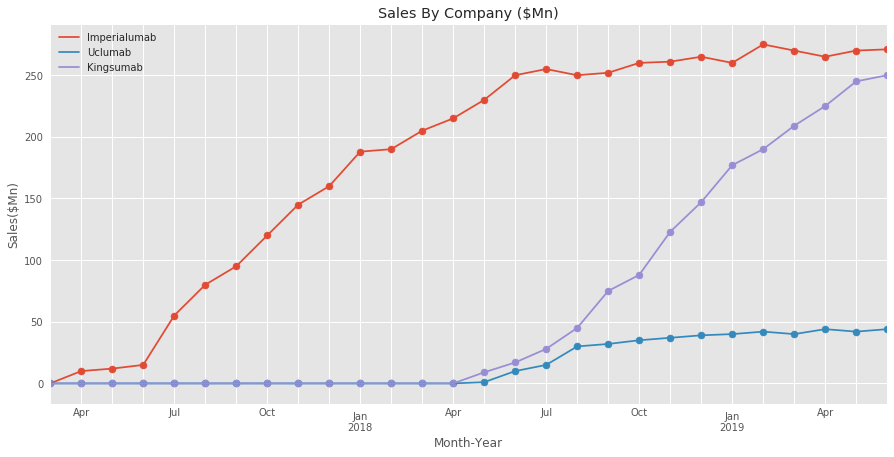

In [11]:
with plt.style.context(('seaborn','ggplot')):
    total_sales_data.plot(y=['Imperialumab','Uclumab','Kingsumab'], figsize=(15,7), title='Sales By Company ($Mn)',
                         xticks=total_sales_data.index)
    plt.scatter(total_sales_data.index, total_sales_data.Imperialumab,)
    plt.scatter(total_sales_data.index, total_sales_data.Uclumab,)
    plt.scatter(total_sales_data.index, total_sales_data.Kingsumab,)
    #plt.xticks(rotation='vertical')
    plt.xlabel('Month-Year')
    plt.ylabel('Sales($Mn)')

**Findings:** 
* Time-series plot clearly shows that imperialumab is leading market in sales of drug. 
* Introduction of `Uclumab & Kingsmab` into competition on Jun-2018 immediately impacted sales of `Imperialumab` in Aug-2018 with its sales going down from Jul-2018.
* It also indicated that even though sales of Kingsumab which started almost 1 year 2 months late than Imperialulab is `catching very fast`.
* Imperialumab sales are seems to be growing at very less rate after `June-2018` because `2 months before` that `Uclumab and Kingsumab` has `launched` and seems to have taken market share of Imperialumab.
* `Uclumab's` growth seems to be `stagnated` after `4 months of its launch`.
* `Kingsumab` is growing at extermly fast rate and `catching Imperialumab`.


**Strengths:**

* It gives exact idea about sales and revenue of each individual company and which one is clear competition of Imperialumab.

**Limitations:**

* Sales comparison seems in favour of Imperialumab because it seems to have started selling drug almost 1 year back then Uclumab and Kingsumab.

----------
**Observation:** Companies shows fast growth in inital `9-12 months` and then `stagnate`.

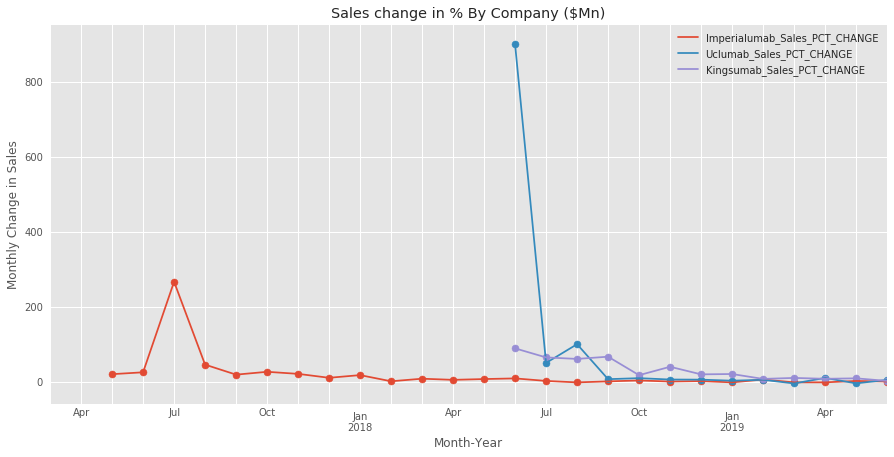

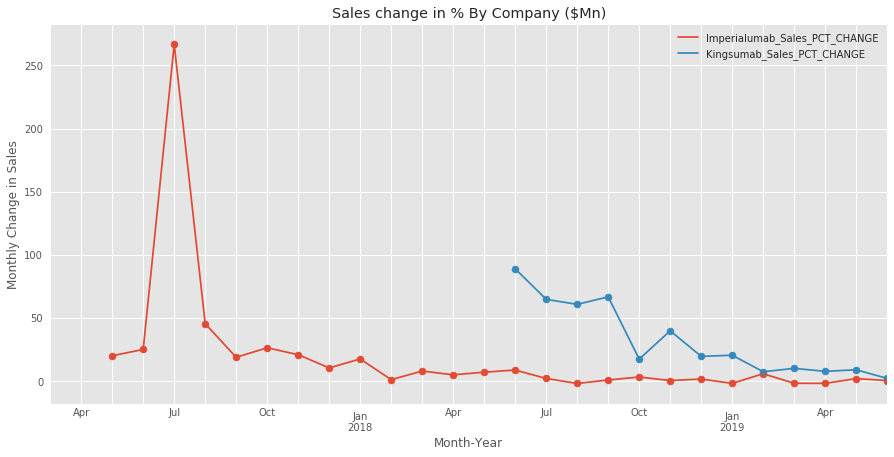

In [12]:
with plt.style.context(('seaborn','ggplot')):
    total_sales_data.plot(y=['Imperialumab_Sales_PCT_CHANGE','Uclumab_Sales_PCT_CHANGE','Kingsumab_Sales_PCT_CHANGE'], 
                          figsize=(15,7), 
                          title='Sales change in % By Company ($Mn)',
                          xticks=total_sales_data.index)
    plt.scatter(total_sales_data.index, total_sales_data.Imperialumab_Sales_PCT_CHANGE,)
    plt.scatter(total_sales_data.index, total_sales_data.Uclumab_Sales_PCT_CHANGE,)
    plt.scatter(total_sales_data.index, total_sales_data.Kingsumab_Sales_PCT_CHANGE,)
    #plt.xticks( total_sales_data.index, rotation='vertical')
    plt.xlabel('Month-Year')
    plt.ylabel('Monthly Change in Sales')
    
with plt.style.context(('seaborn','ggplot')):
    total_sales_data.plot(y=['Imperialumab_Sales_PCT_CHANGE', 'Kingsumab_Sales_PCT_CHANGE'], 
                          figsize=(15,7), 
                          title='Sales change in % By Company ($Mn)',
                          xticks=total_sales_data.index)
    plt.scatter(total_sales_data.index, total_sales_data.Imperialumab_Sales_PCT_CHANGE,)
    plt.scatter(total_sales_data.index, total_sales_data.Kingsumab_Sales_PCT_CHANGE,)
    #plt.xticks( total_sales_data.index, rotation='vertical')
    plt.xlabel('Month-Year')
    plt.ylabel('Monthly Change in Sales')

**Findings:**
* After launch of Imperialumab, it saw peak growth in sales from `June-2017` to `July-2018`. After that it declined or even growth almost stayed constanst.
* Uclumab saw `tremendous initial growth` but then it declined and almost stayed `constant after 3 months` of launch.
* Kingsumab has show quite good growth after launch for almost 8 months and then it stayed constant.

**Strengths:**
* Percentage change in sales gives exact idea about growth. It shows whether there is change in sales percentage on monthly basis.

**Limitations:**
* Percentage change does not give exact idea about sales of company because its change in sales with previous of itself. Some company may have very high change wherease some may have very low eventhough one having already more sales change one with more change.

-----------------
**Hypothesis:** Kingsumab's growth will `cross` sales of Imperialumab in `next 6 months`.

Average percentage change in sales :
Imperialumab_Sales_PCT_CHANGE    18.799
Kingsumab_Sales_PCT_CHANGE       31.841
dtype: float64


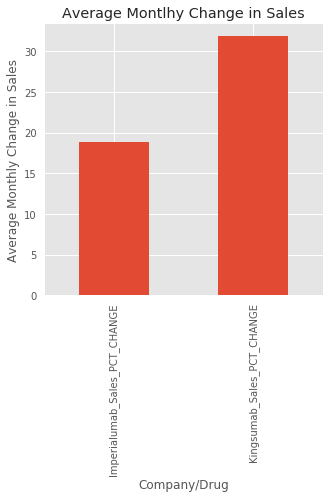

In [13]:
total_sales_pct_change = total_sales_data[['Imperialumab_Sales_PCT_CHANGE', 'Kingsumab_Sales_PCT_CHANGE']].replace(np.inf, np.nan).mean()
print('Average percentage change in sales :')
print(total_sales_pct_change)
with plt.style.context(('seaborn', 'ggplot')):
    total_sales_pct_change.plot(y=['Imperialumab_Sales_PCT_CHANGE', 'Kingsumab_Sales_PCT_CHANGE'],
                                kind='bar',
                                figsize=(5,5),
                                title='Average Montlhy Change in Sales'
                               )
    plt.xlabel('Company/Drug')
    plt.ylabel('Average Monthly Change in Sales')

**Findings:**
* Average percentage change in sales of Imperialumab overtime is around `+(~19%)` whereas its around `+(~32%)` for kingsumab.
* Average percentage change of Kingsumab shows that it'll cross sales of imperialumab in few months if `interpolation` is done.

**Strengths:**

* It clearly shows average growth rate since begining of sales which if positive indicate profit and negative indicates loss.

**Limitations:**

* It's average and can change in future with fast growth of any company with recommendations.

,Imperialumab,Uclumab,Kingsumab,Imperialumab_Sales_PCT_CHANGE,Uclumab_Sales_PCT_CHANGE,Kingsumab_Sales_PCT_CHANGE
2019-03-01,270.000,40.000,209.000,-1.818,-4.762,10.000
2019-04-01,265.000,44.000,225.000,-1.852,10.000,7.656
2019-05-01,270.000,42.000,245.000,1.887,-4.545,8.889
2019-06-01,271.000,44.000,250.000,0.370,4.762,2.041
2019-07-01,272.161,44.527,257.754,-1.097,13.769,-4.586
2019-08-01,273.331,45.253,265.052,-2.614,23.076,-11.434
2019-09-01,274.501,45.978,272.351,-4.130,32.384,-18.282
2019-10-01,275.633,46.680,279.414,-5.597,41.391,-24.910
2019-11-01,276.803,47.406,286.712,-7.114,50.698,-31.758
2019-12-01,277.935,48.108,293.775,-8.581,59.705,-38.385


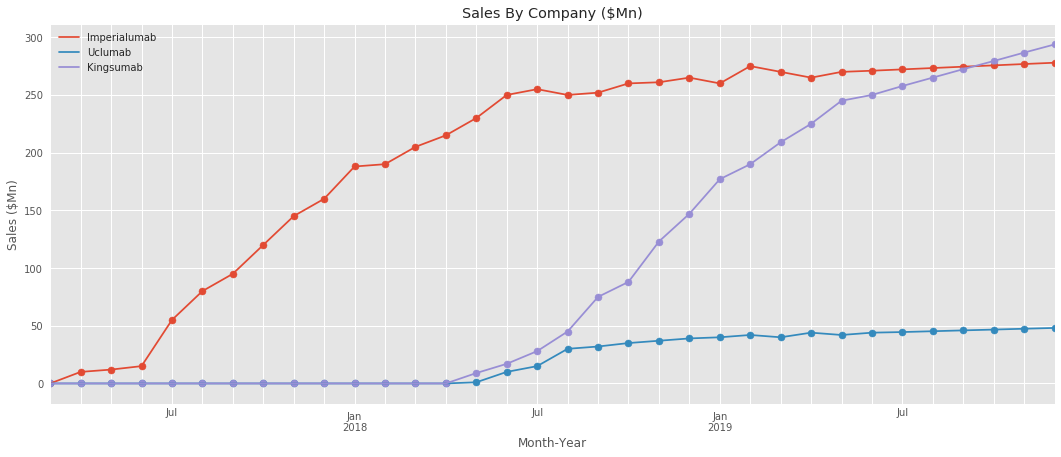

In [14]:
interpolated_sales_data = total_sales_data.reindex(pd.date_range(start='2017-03-01', end='2019-12-01', freq='MS', )).astype(float).interpolate(method='spline', order=1)

with plt.style.context(('seaborn','ggplot')):
    interpolated_sales_data.plot(y=['Imperialumab','Uclumab','Kingsumab'], figsize=(18,7), title='Sales By Company ($Mn)',xticks=interpolated_sales_data.index)
    plt.scatter(interpolated_sales_data.index, interpolated_sales_data.Imperialumab,)
    plt.scatter(interpolated_sales_data.index, interpolated_sales_data.Uclumab,)
    plt.scatter(interpolated_sales_data.index, interpolated_sales_data.Kingsumab,)
    #plt.xticks(interpolated_sales_data.index, interpolated_sales_data.index,)
    plt.xlabel('Month-Year')
    plt.ylabel('Sales ($Mn)')
    
interpolated_sales_data.tail(10)

**Findings:**
* `Linear Interpolation` of Sales data for next 6 months from `Jul-2019 to Dec-2019` shows that Kingsumab will cross sales of Imperialumab in `next 4 months` based on its current growth rate.

**Strengths:**

* Its give strong indication of fierce competition fro Kingsumab to Imperialumab.
* It also give idea about when Kingumab sales will cross Imperialumab if same condition continues and Imperailumab takes no measures.

**Limitations:**

* Iterpolation is done for next 6 months.
* It's not posible that all companies will move into this direction only. Its one of predictions using linear formula.

------------
**Hypothesis:** Imperialumab salesmen has conducted highest `face 2 face` interview with doctors in all regions.

Average Face 2 Face Done Per Company in all regions : 
Imperialumab_Face_2_Face    11.2
Uclumab_Face_2_Face         22.9
Kingsumab_Face_2_Face       11.2
dtype: float64


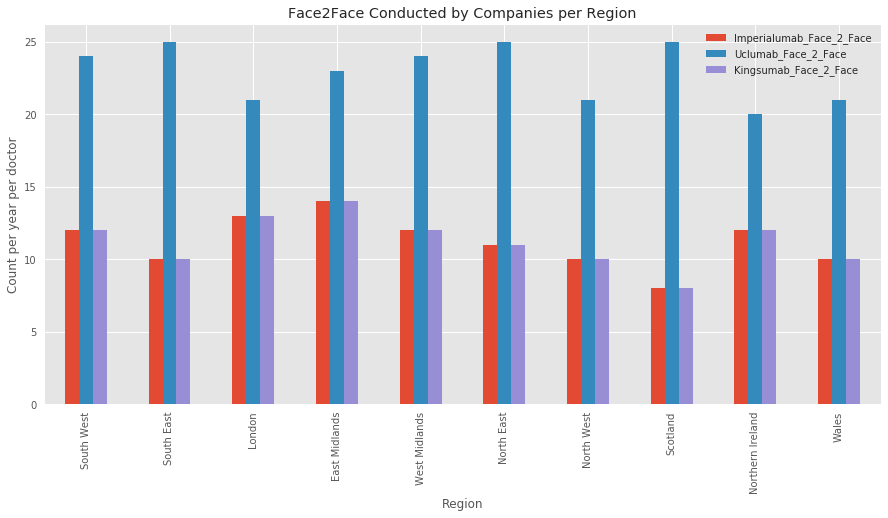

In [15]:
print('Average Face 2 Face Done Per Company in all regions : ')
print(total_marketing.mean().loc[['Imperialumab_Face_2_Face','Uclumab_Face_2_Face','Kingsumab_Face_2_Face'],])

with plt.style.context(('seaborn','ggplot')):
    total_marketing.plot(kind='bar', y=['Imperialumab_Face_2_Face','Uclumab_Face_2_Face','Kingsumab_Face_2_Face'], 
                         figsize=(15,7),
                         title='Face2Face Conducted by Companies per Region',)
    plt.xlabel('Region')
    plt.ylabel('Count per year per doctor')

**Findings:**
* It's clearly visible that Uclumab has conducted almost more than twice the size of Face 2 Face interview than conducted by Imperialumab and Kingsumab in all regions.
* Imperialumab and Kingsumab has conducted same amount of face 2 face in all regions.

**Strengths:**

* It gives idea about clear comparison of face 2 face interview and shows clear picture.

**Limitations:**

* It's just giving count per region and no other data is given.

----------
**Hypothesis:** Imperialumab has performed highest number of `Med Education sessions` compared to Kingsumab and Uclumab.

Average Med Ed Done Per Company in all regions : 
Imperialumab_Med_Ed    11.4
Uclumab_Med_Ed          5.6
Kingsumab_Med_Ed       19.8
dtype: float64


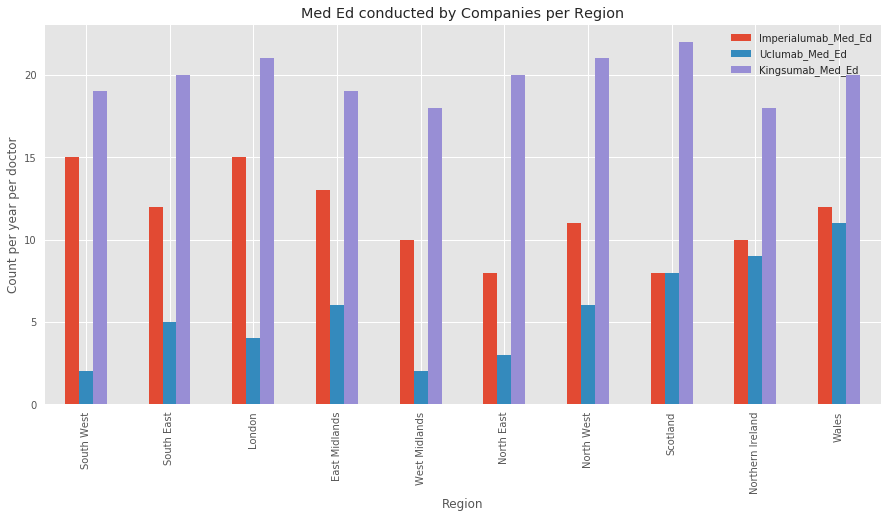

In [16]:
print('Average Med Ed Done Per Company in all regions : ')
print(total_marketing.mean().loc[['Imperialumab_Med_Ed','Uclumab_Med_Ed','Kingsumab_Med_Ed'],])

with plt.style.context(('seaborn','ggplot')):
    total_marketing.plot(kind='bar', y=['Imperialumab_Med_Ed','Uclumab_Med_Ed','Kingsumab_Med_Ed'], 
                         figsize=(15,7), 
                         title='Med Ed conducted by Companies per Region',)
    plt.xlabel('Region')
    plt.ylabel('Count per year per doctor')

**Findings:**
* Kingsumab has conducted almost `~0.5-2 times` med ed compared to Imperialumab in all regions
* Med ed conducted by Uclumab are quite less compared to Kingsumab in all regions
* Med ed performed by Uclumab and Kingsumab are almost same in `Scotland, Northern Ireland and Wales` regions.

**Strengths:**

* Bar chart is giving clear comparison of Med Ed performed per companies and helps for decision making.

**Limitations:**

* It's just giving count per region and no other data is given.

-------------
**Hypothesis:** Imperialumab has sent highest amount of `unsolicited e-mails` than Uclumab & Kingsumab.

Average Unsolicited e-mails sent Per Company in all regions : 
Imperialumab_Unsolicited_e-mail    14.3
Uclumab_Unsolicited_e-mail          1.1
Kingsumab_Unsolicited_e-mail        8.4
dtype: float64


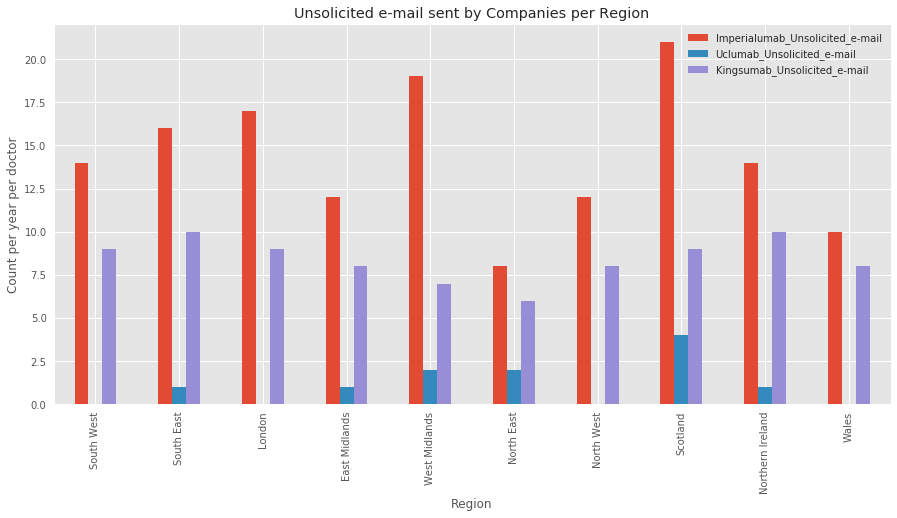

In [17]:
print('Average Unsolicited e-mails sent Per Company in all regions : ')
print(total_marketing.mean().loc[['Imperialumab_Unsolicited_e-mail','Uclumab_Unsolicited_e-mail','Kingsumab_Unsolicited_e-mail'],])

with plt.style.context(('seaborn','ggplot')):
    total_marketing.plot(kind='bar', y=['Imperialumab_Unsolicited_e-mail','Uclumab_Unsolicited_e-mail','Kingsumab_Unsolicited_e-mail'], 
                         figsize=(15,7), 
                         title='Unsolicited e-mail sent by Companies per Region',)
    plt.xlabel('Region')
    plt.ylabel('Count per year per doctor')

**Findings:**
* Unsolicited e-mails sent by Imperialmab is `quite high` than Uclumab and Kingsumab.
* Unsolicited e-mails sent by Imperialumab is almost `~0.5-2.0` times than that of Kingsumab.
* Unsolicited e-mails sent by Uclumab are highest(5) in Scotland wheareas it has sent nearly 1-2 emails in other regions and no mails in South West, London, North West & Wales.

**Strengths:**

* Bar chart shows clear comparisons per region of companies which helps in making decision better.

**Limitations:**

* It's just giving count per region and no other data is given.

-----------
**Hypothesis:** Imperialumab has sent highest amount of `hard mails` in all regions.

Average Hard mails sent Per Company in all regions : 
Imperialumab_Hard_mail    14.3
Uclumab_Hard_mail         15.0
Kingsumab_Hard_mail       14.0
dtype: float64


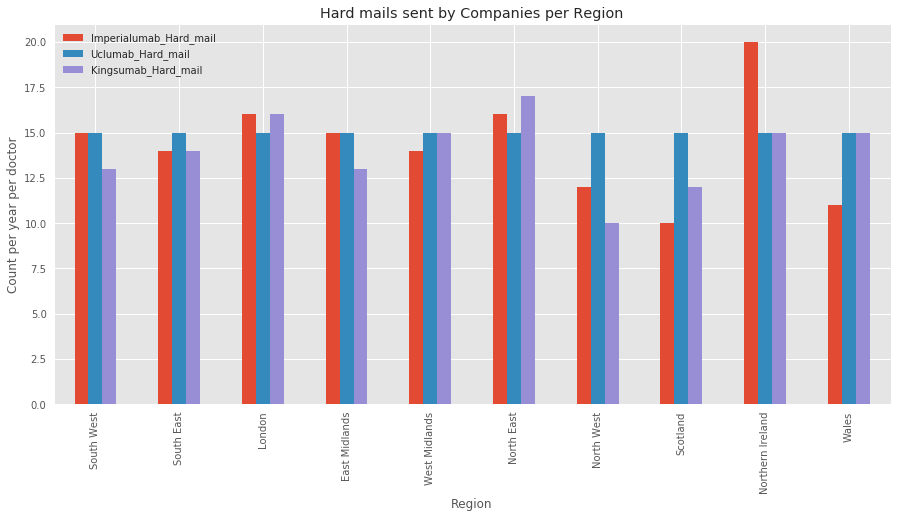

In [18]:
print('Average Hard mails sent Per Company in all regions : ')
print(total_marketing.mean().loc[['Imperialumab_Hard_mail','Uclumab_Hard_mail','Kingsumab_Hard_mail'],])

with plt.style.context(('seaborn','ggplot')):
    total_marketing.plot(kind='bar', y=['Imperialumab_Hard_mail','Uclumab_Hard_mail','Kingsumab_Hard_mail'], 
                         figsize=(15,7), 
                         title='Hard mails sent by Companies per Region',)
    plt.xlabel('Region')
    plt.ylabel('Count per year per doctor')

**Findings:**
* Hard mails sent by all companies are almost same in all regions with `exceptions` like `Northern Ireland, North West, Scotland and Wales`.
* Imperialumab has highest amount of hard mails in Northern Ireland.
* Uclumab has sent same 15 hard mails in all regions.
* `Average` hard mails sent by each company is `~14-15`.

**Strengths:**

* Bar chart shows clear comparisons per company in all regions which helps in making better decisions.

**Limitations:**

* It's just giving count per region and no other data is given.

## Recommendations

After doing in-depth analysis of data, we'll be suggesting few recommendations to MD of Imperialumab which can help improve market share and sales of drug.

* `Face 2 Face` detailing per year per doctor is around 12 which less in few regions and more in few regions than expected. South East, North West, Scotland and Wales regions has 10 or less Face 2 face detailing which should be brought down to average of 12 for better results. London and East Midlands has crossed this `optimal count of 12` and might be reason for losing customers in these regions. London and East Midlands should bring down face 2 face detailing count to optimal 12. 
* Do not cross face 2 face count of 12-15 as it seems to have impacted sales of Uclumab which stagnated in few months after it launch.
* `Medical Education's optimal count` is around `19-20` per regions which is quite less currently for Imperial with average of ~11 per regions. Imperialumab should conduct more Med Education as it seems to have boost sales of Kingsumab quite well.South East, West Midlands, North East, North West, Scotland, Northern Ireland and Wales regions should be targeted for Med Eds. Overall try to bring average Med Ed count from current ~11 to ~19-20.
* Imperialumab should `decrease average unsolicited e-mails` sent by company from `14` to around 9 per region as more mails might be going to spam. Scotland, West Midlands, London and South East has sent more than 15 unsolicited e-mails which can be spamming user. `Optimal` requirement is around `9` for best results of sending unsolicited e-mails and more than that results in downgrading of results.
* Average 15 hard mails are sent in all regions by Imperialumab except North West, Scotland and Wales regions which should be targeted as well.
* Northern Ireland has been sent 5 more mails than average of around 15. Try to bring down hard mails sent same in all regions and equaly targetting. `Optimal value` of sending `hard mails` is around `15` at which best results come.
* Inform sales representative to make doctors aware of `benefits of using Imperialumab` compared to competitions (Kingsumab & Uclumab) during face-2-face detailing and medical education:
    * Ask sales representative to highlight attributes like `efficacy, side effect profile, formulation and safety profile` as it easily beats its compititor in these attributes. Dosing strong point of competitor Kingsumab hence it should be handled carefully while discussing with doctors.
    * `Patent` of Imperialumab `expires` in `2025` which is 4 years later than Kingsumab and 3 years later than Uclumab. Once patent of Kingsumab expires in `2021` then even `cheap alternatives` will be available than Imperialumab because after that original moldecules will be available to generics companies to create cheap alternatives. Uclumab's patent expires in `2022` which will open doors for even more cheap alternatives which will further impact sales of Imperialumab. As patent of Kingsumab expires in 2021 also can be main reason they will be doing high marketing for sale of drug before it expires in next `2.5 years`.
    * If person lives for 1 year healthy using drug than Quality Adjusted Life Year (QALY) is given value of 1. Now cost of liviling healthy life given Imperialumab is around `28k Pounds` whereas same cost with Kingsumab is `28.5k` pounds and with Uclumab is around `29k` pounds. Hence cost of using Kingsumab is `~1.78%` costly than Imperiulab and Uclumab is `~3.57%` more costly than Imperialumab per year which can sigficantly impact pockets of customers if drugs are used for years. This can be highlighted as well by representative to doctors/retailers during face-2-face and med eds.
    * Imperialumab `price already seems less` than Kingsumab and Uclumab hence reducing price more will not impact sales much. Price of Imperialumab does not seem to be helping much with it cost from analysis because Kingsumab has more price/QALY compared to Imperialumab still its sales are soaring at very fast rate. I would suggest not to play with price as of now and try other recommendations mentioned above to see results and then decide on price changes if above recommendations does not help much in improving sales.


## Conclusion
Eventhough Imperialumab currently seems to be leading market but its facing fierce competition from Kingsumab which is taking its market share and may be crossing it in next 6 months if no measures are taken by company to fight competition. We have provided list of recommendations above about targeting perticular region and particular marketing practice to increase sales of company. Companies growth seems to have stagnated since last 6-8 months due to competitions from Kingsumab and Uclumab which can be boosted again with above mentioned recommendations.

## References
* https://en.wikipedia.org/wiki/Quality-adjusted_life_year
* https://en.wikipedia.org/wiki/Incremental_cost-effectiveness_ratio